In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics

In [3]:
def compute_beta_measures(G):

    # COMPUTE LAMBDAS (OUT-DEGREE)
    lambdas = dict(G.out_degree())

    # COMPUTE BETA-MEASURES
    beta_measures = {}
    for target_node in list(G.nodes()):
        beta = 0
        predecessors = list(G.predecessors(target_node))

        for node in predecessors:
            beta += G.get_edge_data(node, target_node)["weight"] / lambdas[node]

        beta_measures[target_node] = beta

    return beta_measures

# Analysis of cumulative network dynamics

In [4]:
# SET YEAR RANGE
first_year = 2010; last_year = 2019
years = [str(y) for y in range(first_year, last_year+1)]

# INITIALIZE DICTIONARY OF DATAFRAME FOR SURFERS
results_dict = {}

# LOOP OVER YEARS
for year in years:

    # LOAD NETWORK FOR YEAR
    year_net = nx.read_gml(f"../data/time_series_networks/overall_snapshot_{year}.gml")

    # GET SURFERS IN SEASON
    year_df = pd.read_csv(f"../data/results_data/wsl_results_{year}.csv")
    year_surfers = list(year_df["Name"])

    # GET IN-DEGREE AND BETA
    in_degrees = dict(year_net.in_degree(weight="weight"))
    betas = compute_beta_measures(year_net)
    deg_per_event = {}

    for surfer in in_degrees.keys():
        try:
            deg_per_event[surfer] = in_degrees[surfer] / year_net.nodes[surfer]["events"]
        except:
            deg_per_event[surfer] = 0

    # LOOP OVER NODES IN NETWORK
    for surfer in list(year_net.nodes()):

        if surfer not in year_surfers:
            continue

        # UPDATE DATAFRAME IF SURFER ALREADY BEING TRACKED
        if surfer in results_dict.keys():
            results_dict[surfer].loc[year] = [in_degrees[surfer], betas[surfer], deg_per_event[surfer]]

        # INITIALIZE DATAFRAME IF SURFER NOT BEING TRACKED
        else:
            results_dict[surfer] = pd.DataFrame(columns=["in-degree", "beta", "deg_per_event"])
            results_dict[surfer].loc[year] = [in_degrees[surfer], betas[surfer], deg_per_event[surfer]]

for key, df in results_dict.items():
    results_dict[key] = df.reset_index(names="year")

Josh Kerr
Julian Wilson
Alejo Muniz
Gabriel Medina
John John Florence
Miguel Pupo
Kolohe Andino
Nat Young
Filipe Toledo
Sebastian Zietz
Italo Ferreira
Frederico Morais
Caio Ibelli


Text(0, 0.5, 'Beta-measure')

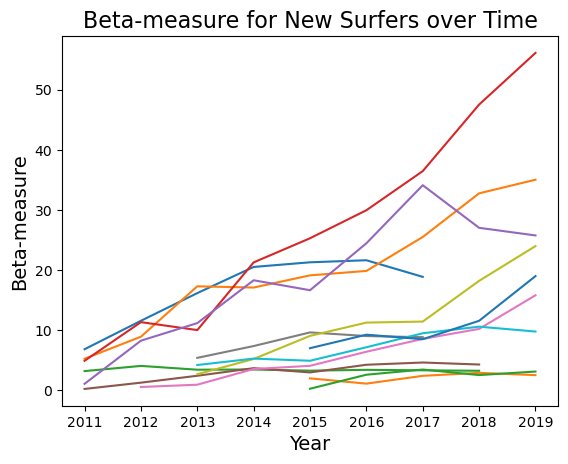

In [5]:
for surfer, df in results_dict.items():

    if len(df) <= 4:
        continue

    if "2010" in df["year"].values:
        continue

    print(surfer)

    plt.plot(df["year"], df["beta"])

plt.title("Beta-measure for New Surfers over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Beta-measure", fontsize=14)

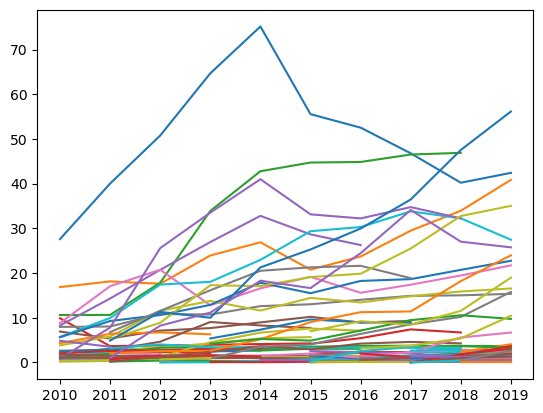

In [6]:
for surfer, df in results_dict.items():

    plt.plot(df["year"], df["beta"])

### Try filtering out surfers who were already on the tour in 2010 (new)

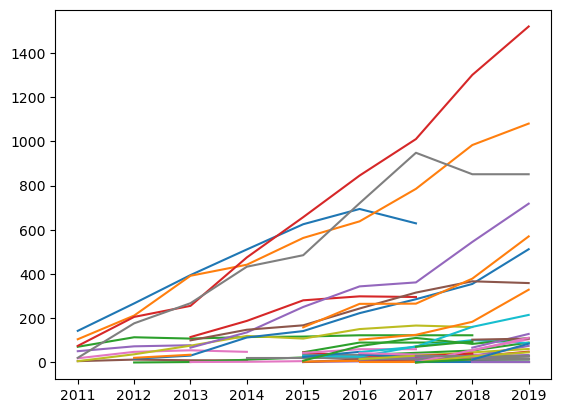

In [7]:
for surfer, df in results_dict.items():

    if "2010" in df["year"].values:
        continue

    plt.plot(df["year"], df["in-degree"])

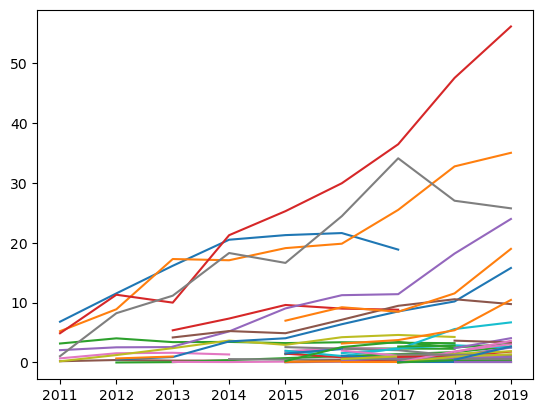

In [8]:
for surfer, df in results_dict.items():

    if "2010" in df["year"].values:
        continue

    plt.plot(df["year"], df["beta"])

# Analysis of performance in individual seasons

In [9]:
# SET YEAR RANGE
first_year = 2010; last_year = 2019
years = [str(y) for y in range(first_year, last_year+1)]

# INITIALIZE DICTIONARY OF DATAFRAME FOR SURFERS
seasons_dict = {}

# LOOP OVER YEARS
for year in years:

    # LOAD NETWORK FOR YEAR
    year_net = nx.read_gml(f"../data/season_networks/{year}_season.gml")

    # GET IN-DEGREE AND BETA
    in_degrees = dict(year_net.in_degree(weight="weight"))
    betas = compute_beta_measures(year_net)
    deg_per_event = {}

    for surfer in in_degrees.keys():
        try:
            deg_per_event[surfer] = in_degrees[surfer] / year_net.nodes[surfer]["events"]
        except:
            deg_per_event[surfer] = 0

    # LOOP OVER NODES IN NETWORK
    for surfer in list(year_net.nodes()):

        # UPDATE DATAFRAME IF SURFER ALREADY BEING TRACKED
        if surfer in seasons_dict.keys():
            seasons_dict[surfer].loc[year] = [in_degrees[surfer], betas[surfer], deg_per_event[surfer]]

        # INITIALIZE DATAFRAME IF SURFER NOT BEING TRACKED
        else:
            seasons_dict[surfer] = pd.DataFrame(columns=["in-degree", "beta", "deg_per_event"])
            seasons_dict[surfer].loc[year] = [in_degrees[surfer], betas[surfer], deg_per_event[surfer]]

for key, df in seasons_dict.items():
    seasons_dict[key] = df.reset_index(names="year")

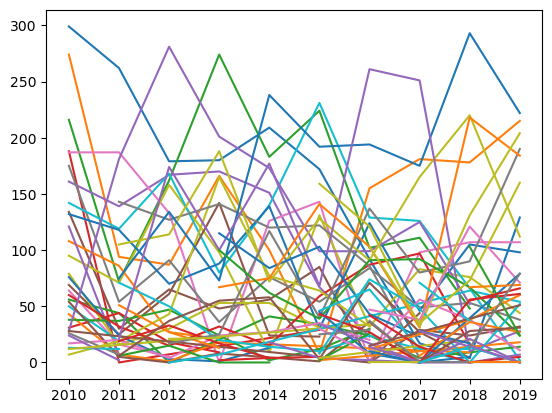

In [10]:
for surfer, df in seasons_dict.items():

    # if "2010" in df["year"].values:
    #     continue

    # if len(df) < 5:
    #     continue

    plt.plot(df["year"], df["in-degree"])

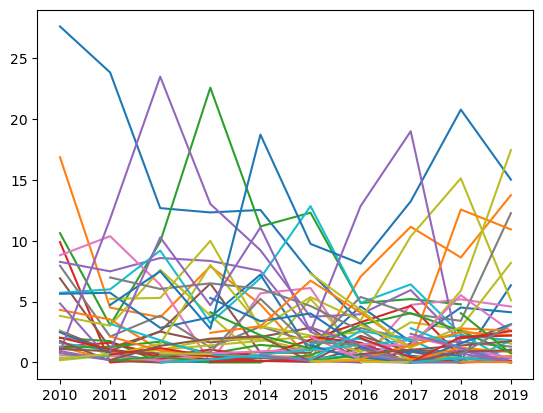

In [10]:
for surfer, df in seasons_dict.items():

    plt.plot(df["year"], df["beta"])

## Analyze careers of new surfers

In [11]:
# CREATE DICT FOR NEW SURFERS (NOT ON CT IN 2010)
new_surfers = {}

for surfer, df in seasons_dict.items():

    if "2010" in df["year"].values:
        continue

    new_surfers[surfer] = seasons_dict[surfer]

In [12]:
print(len(new_surfers))

84


### Compare different lengths of career

In [13]:
long_cars = {}
short_cars = {}

cutoff = 2

for surfer, df in new_surfers.items():

    if len(df) <= cutoff:
        short_cars[surfer] = df
    else:
        long_cars[surfer] = df

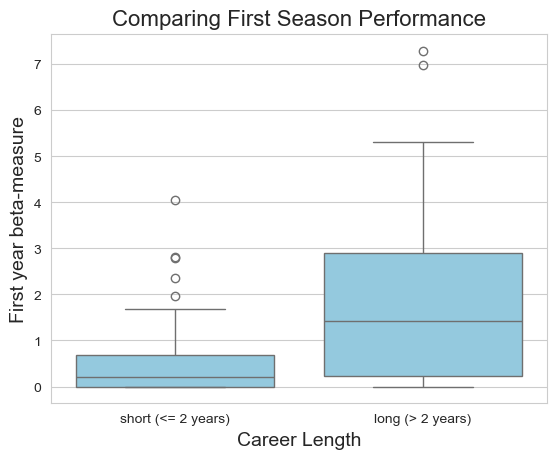

<Figure size 640x480 with 0 Axes>

In [18]:
# GET DISTRIBUTIONS OF FIRST SEASON RESULTS FOR EACH GROUP
short_first_degrees = []
short_first_betas = []
short_first_seasons = []
long_first_degrees = []
long_first_betas = []
long_first_seasons = []

sns.set_style("whitegrid")

for surfer, df in short_cars.items():
    short_first_degrees.append(df.iloc[0]["in-degree"])
    short_first_betas.append(df.iloc[0]["beta"])
    short_first_seasons.append(len(df))
short_cat_col = ["short (<= 2 years)" for i in range(len(short_first_degrees))]

for surfer, df in long_cars.items():
    long_first_degrees.append(df.iloc[0]["in-degree"])
    long_first_betas.append(df.iloc[0]["beta"])
    long_first_seasons.append(len(df))
long_cat_col = ["long (> 2 years)" for i in range(len(long_first_degrees))]

# CREATE DATAFRAME
short_df = pd.DataFrame({"car_length": short_cat_col, "in-degree": short_first_degrees, "beta": short_first_betas, "seasons": short_first_seasons})
long_df = pd.DataFrame({"car_length": long_cat_col, "in-degree": long_first_degrees, "beta": long_first_betas, "seasons": long_first_seasons})
df = pd.concat([short_df, long_df])

# MAKE BOXPLOTS
sns.boxplot(x="car_length", y="beta", data=df, color="skyblue")
plt.title("Comparing First Season Performance", fontsize=16)
plt.xlabel("Career Length", fontsize=14)
plt.ylabel("First year beta-measure", fontsize=14)

plt.show(); plt.clf()

In [21]:
print(statistics.mean(short_df["beta"]))
print(statistics.mean(long_df["beta"]))

0.5715320748205082
1.9146724379112594


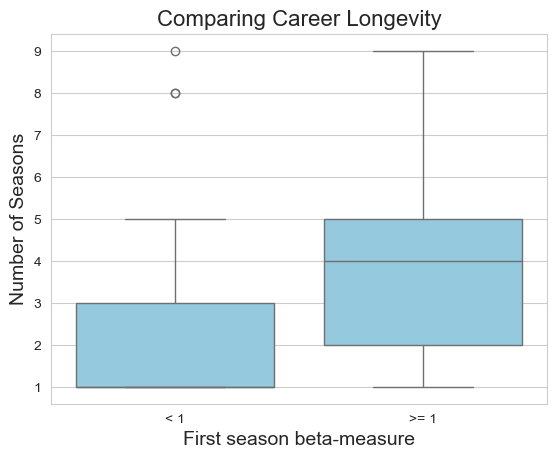

<Figure size 640x480 with 0 Axes>

In [17]:
labels = []
for i in df["beta"]:
    if i >= 1:
        labels.append(">= 1")
    else:
        labels.append("< 1")
df["label"] = labels

# MAKE BOXPLOTS
sns.boxplot(x="label", y="seasons", data=df, color="skyblue")
plt.title("Comparing Career Longevity", fontsize=16)
plt.xlabel("First season beta-measure", fontsize=14)
plt.ylabel("Number of Seasons", fontsize=14)

plt.show(); plt.clf()

### get trajectory for Gabriel Medina

In [64]:
results_dict["Gabriel Medina"]

,year,in-degree,beta,deg_per_event
0,2011,75.0,4.881794,12.500000
1,2012,206.0,11.317442,12.875000
2,2013,256.0,9.997517,9.846154
3,2014,475.0,21.265102,12.837838
4,2015,657.0,25.280672,13.687500
5,2016,845.0,29.946074,14.322034
6,2017,1010.0,36.460331,14.428571
7,2018,1300.0,47.539103,16.049383
8,2019,1519.0,56.134790,16.510870
